데이터 활용 실습 
===
---


+  <h3>  목표: 우리동네의 치킨집의 갯수를 알아보자    </h3>  


#### 문제해석 
> * <u>우리동네 </u> : 금정구의 동단위의 정보로 제한 
> *  <u> 치킨집  </u> : 등록된 '업태구분명'의 '통닭'이 들어가는 모든 가게 
> * <u> 최종목표 </u> : 금정구의 동별  <u> '치킨집' </u> 갯수 계산  



#### 문제해결 순서 
>1. 데이터 얻기
    * 어디서 어떤 데이터를 얻어야 할까? 



>2. 자료 전처리 및 통계량 계산 
    * 동별 업태구분에 따른 가게정보만 가져올수있을까 ? 
    * 데이터 형태를 어떻게 정리할까? 
    * 자료정리를 위한 방법은 어떻게 해야할까? 
    * 갯수를 세는 기준과 방법은 어떻게 해야할까? 
    



>3.시각화하기 
    * 어떻게 하면 가장 효과적으로 시각화 할수있을까 ? 
    
    
***

1. 데이터 얻기 
 * 지방행정 인허가 데이터개방 사이트 LOCALDATA
 * URL : http://www.localdata.kr

![1_](https://github.com/smallorbig/smallorbig.github.io/blob/master/blog/R/Chicken/images/lec1.png?raw=true)
![2_](https://github.com/smallorbig/smallorbig.github.io/raw/master/blog/R/Chicken/images/lec2.png)    



>* 부산광역시 데이터 다운로드 (압축된 191개 파일, 약 100mb 용량) <br>
     - 6260000_부산광역시_07_24_04_P_일반음식점.xlsx 하나의 파일만 사용 (쉽게 사용하기 위해서 data.xlsx로 이름을 변경해서 사용하실수 있습니다.)
 
     
     
     
     
---
     
     


데이터 전처리와 통계랑 계산 
===

* 전처리에 필요한 패키지 ' import ' 하기 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

## 데이터 로드하기 

* <h4> stores 변수에  data 파일 할당하기  </h4> 
------


In [2]:
%time stores = pd.read_excel("data.xlsx") 

Wall time: 1min 1s


##### 자주쓰는  method
* filename.shape :  (행 갯수 , 열 갯수)
* filename.info() :어떤 변수가 있는지 몇개의 데이터에 결측값이 얼마나 있는지 데이터 타입이 어떻게 되는지 



* filename.columns : 데이터의 변수의 열 이름들을 보여줍니다

* filename.loc[0]
* filename.iloc[0]

* filename.head()/filename.tail() : 앞의/뒤의 5개만 보여줌 



In [3]:
stores.shape

(103948, 22)

In [4]:
stores.columns

Index(['번호', '개방서비스명', '개방서비스ID', '개방자치단체코드', '관리번호', '인허가일자', '영업상태구분코드',
       '영업상태명', '상세영업상태코드', '상세영업상태명', '소재지전화', '소재지면적', '소재지우편번호', '소재지전체주소',
       '도로명전체주소', '도로명우편번호', '사업장명', '업태구분명', '좌표정보(X)', '좌표정보(Y)', '위생업태명',
       '시설총규모'],
      dtype='object')

In [5]:
# 대괄호 : [ ]
# 중괄호 : { }
# 소괄호 : ( )

In [6]:
stores.head()  
#stores.tail()

,번호,개방서비스명,개방서비스ID,개방자치단체코드,관리번호,인허가일자,영업상태구분코드,영업상태명,상세영업상태코드,상세영업상태명,...,소재지우편번호,소재지전체주소,도로명전체주소,도로명우편번호,사업장명,업태구분명,좌표정보(X),좌표정보(Y),위생업태명,시설총규모
0,1,일반음식점,07_24_04_P,3250000,3250000-101-1975-01665,19750422,1,영업/정상,1,영업,...,600011.0,부산광역시 중구 중앙동1가 21-3번지,부산광역시 중구 중앙대로29번길 2-11 (중앙동1가),48957.0,중앙식당,한식,385573.789754,179849.859820,한식,13.00
1,2,일반음식점,07_24_04_P,3250000,3250000-101-1975-01664,19750422,1,영업/정상,1,영업,...,600011.0,부산광역시 중구 중앙동1가 21-3번지,부산광역시 중구 중앙대로29번길 2-11 (중앙동1가),48957.0,실비쭈꾸미,한식,385584.002407,179852.210611,한식,0.00
2,3,일반음식점,07_24_04_P,3250000,3250000-101-2019-00027,20190403,1,영업/정상,1,영업,...,600043.0,부산광역시 중구 남포동3가 14-5번지,"부산광역시 중구 남포길 6, 지상5층 (남포동3가)",48953.0,탑플로어(Top floor),기타,384972.285484,179636.032683,기타,109.50
3,4,일반음식점,07_24_04_P,3250000,3250000-101-2019-00029,20190409,1,영업/정상,1,영업,...,600809.0,부산광역시 중구 부평동3가 64-3번지,"부산광역시 중구 보수대로44번길 10-1, 1층 (부평동3가)",48975.0,림스치킨 부평점,기타,384466.492771,179908.574342,기타,44.30
4,5,일반음식점,07_24_04_P,3250000,3250000-101-2019-00035,20190418,1,영업/정상,1,영업,...,600061.0,부산광역시 중구 신창동1가 18-1번지,"부산광역시 중구 중구로34번길 20, 지상1층 (신창동1가)",48947.0,봉자네,한식,385023.067386,179871.783262,한식,39.77


* 소재지전체주소'와 '업태구분명'을 모은다

columns 선택과  unique 확인하기 

In [7]:
stores['소재지전체주소'].head()

0    부산광역시 중구 중앙동1가 21-3번지 
1    부산광역시 중구 중앙동1가 21-3번지 
2    부산광역시 중구 남포동3가 14-5번지 
3    부산광역시 중구 부평동3가 64-3번지 
4    부산광역시 중구 신창동1가 18-1번지 
Name: 소재지전체주소, dtype: object

In [8]:
stores['업태구분명'].head()

0    한식
1    한식
2    기타
3    기타
4    한식
Name: 업태구분명, dtype: object

In [9]:
stores['업태구분명'].unique()

array(['한식', '기타', '경양식', '호프/통닭', '일식', '회집', '식육(숯불구이)', '통닭(치킨)',
       '정종/대포집/소주방', '분식', '중국식', '패스트푸드', '복어취급', '냉면집', '까페', '뷔페식',
       '탕류(보신용)', '김밥(도시락)', '외국음식전문점(인도,태국등)', '키즈카페', '패밀리레스트랑', '전통찻집',
       '관광호텔', '출장조리', '이동조리', nan, '라이브카페', '감성주점', '일반조리판매',
       '식품등 수입판매업'], dtype=object)

### 원하는 데이터만 뽑아서 subset 만들기 

* "소재지전체주소"와 "업태구분명"만을 갖는 store_trim 변수를 새로 만들어 우리가 원하는 형태로 가공한다.
---

In [10]:
stores_trim = stores[['소재지전체주소', '업태구분명']]

In [11]:
stores_trim.head()

,소재지전체주소,업태구분명
0,부산광역시 중구 중앙동1가 21-3번지,한식
1,부산광역시 중구 중앙동1가 21-3번지,한식
2,부산광역시 중구 남포동3가 14-5번지,기타
3,부산광역시 중구 부평동3가 64-3번지,기타
4,부산광역시 중구 신창동1가 18-1번지,한식


In [12]:
###type(stores_trim)

### 뽑아온 변수들의  col명 바꿔주기 

>먼저 편리함을 위해서 열 이름을 영어로 바꾼다. 그리고 다음 필터링을 적용하자.
>
>* 소재지전체주소 : "금정구"가 포함되는 행을 모으자.
>
>* 업태구분명 : "통닭"이 포함되는 행을 모으자.

In [13]:
stores_trim = stores_trim.rename(columns={"소재지전체주소":"address", "업태구분명":"business"})
# stores_trim.columns = ['address','business']

In [14]:
stores_trim.head()

,address,business
0,부산광역시 중구 중앙동1가 21-3번지,한식
1,부산광역시 중구 중앙동1가 21-3번지,한식
2,부산광역시 중구 남포동3가 14-5번지,기타
3,부산광역시 중구 부평동3가 64-3번지,기타
4,부산광역시 중구 신창동1가 18-1번지,한식


In [15]:
#####밑에 있는건 만약 형식이 문자형이 아니라면 문자형으로 바꿔주는것 
# stores_trim["address"] = stores_trim["address"].astype(str)
type(stores_trim['address'][0])

str

In [16]:
ck = stores_trim[stores_trim["address"].str.contains("금정구") & stores_trim["business"].str.contains("통닭")].copy()

In [17]:
ck.head()

,address,business
69090,부산광역시 금정구 장전동 419-21번지,호프/통닭
69095,부산광역시 금정구 청룡동 83-12번지,통닭(치킨)
69163,부산광역시 금정구 장전동 413-10번지,호프/통닭
69173,부산광역시 금정구 장전동 302-10번지,통닭(치킨)
69174,부산광역시 금정구 장전동 418-9번지,호프/통닭


In [18]:
ck.shape

(955, 2)

In [19]:
ck["address"] = ck["address"].str.extract("(\S+동)")


* <h5>   "address"의 상세 주소를 동이름만 남기도록 바꾸자. </h5>

 예를 들면 "부산광역시 금정구 장전동 419-21번지"라는 주소에서 "장전동"만을 남기려고 한다면 어떤 방법을 사용하면 될까요? 여기서는 "[공백]장전동[공백]"를 모아서, 양쪽 [공백]을 제거하는 방법을 사용했습니다. 아래와 같이 텍스트를 가공하는 방식을 정규표현식(Regular Expression)이라고 합니다.
	




   | 표현 |              역활              |
    |------|:-----------------------------:|
    | \\s  | 공백                          |
    | \\S  | 공백 아닌 것                   |
    | i+   | i가 최소 1회이상 나오는 경우    |


<br>
<br>
<br>
<br>
<br>
<br>
<br>

* 추가적인 간단한 정규표현식

정규표현식에 통달하기는 아주 어렵지만, 아래 추가적인 간단한 정규표현식으로도 많은 것을 할 수 있습니다.

| 표현     | 역할                            |
|:--------:|:--------------------------------|
| \\\d     | 숫자                            |
| \\\D     | 숫자 아닌 것                    |
| [0-9]    | 모든 숫자                       |
| [A-Z]    | 영어 대문자                     |
| [a-z]    | 영어 소문자                     |
| [A-z]    | 모든 영문자                     |
| i{n1,n2} | i가 n1에서 n2회 나오는 경우경우 |








> **중요** <br> 
 이제 "address"에 속한 *동 이름* 이 몇 번 중복하느냐가 그 동에 속한 `치킨집` 갯수 입니다!


<br>
<br>
<br>
<br>

* <h5> `ck`의 "address"열 하나에 대해서 중복 값을 세어봅니다. </h5>



In [20]:
ck.head()

,address,business
69090,장전동,호프/통닭
69095,청룡동,통닭(치킨)
69163,장전동,호프/통닭
69173,장전동,통닭(치킨)
69174,장전동,호프/통닭


In [21]:
ck.shape

(955, 2)

* <h5> value_counts() : 중복된 값들을 셀때. </h5>
* <h5> .values : 시리즈의 데이터들을 알려줌 </h5>
* <h5> .keys() : 시리즈의 index 들을 알려줌 </h5>

In [22]:
ck_count = ck["address"].value_counts()

In [23]:
ck_count

장전동    299
서동     213
부곡동    182
구서동    126
남산동     92
금사동     25
청룡동     11
회동동      5
노포동      2
Name: address, dtype: int64

In [24]:
ck_count.values

array([299, 213, 182, 126,  92,  25,  11,   5,   2], dtype=int64)

In [25]:
ck_count.keys()

Index(['장전동', '서동', '부곡동', '구서동', '남산동', '금사동', '청룡동', '회동동', '노포동'], dtype='object')

In [26]:
df_ck = pd.DataFrame(columns =["address", "chicken"])
df_ck

,address,chicken


In [27]:
df_ck["address"] = ck_count.keys()
df_ck["chicken"] = ck_count.values
df_ck

,address,chicken
0,장전동,299
1,서동,213
2,부곡동,182
3,구서동,126
4,남산동,92
5,금사동,25
6,청룡동,11
7,회동동,5
8,노포동,2


In [28]:
type(df_ck)

pandas.core.frame.DataFrame

Q. 저희는 모든 동 정보를 다 가져온 것일까요? 치킨집 갯수가 0개인 곳은 없을까요?

지도 정보를 사용해서 모든 동 정보를 가져와 봅시다.

시각화 
===

<br>
<br>
<br>
<br>





In [29]:
import geopandas as gpd #한글  


In [30]:
%time korea = gpd.read_file("map/TL_SCCO_EMD.shp", encoding='euc-kr')

Wall time: 2.65 s


In [31]:
korea.head()

,EMD_CD,EMD_ENG_NM,EMD_KOR_NM,geometry
0,42110101,Bongui-dong,봉의동,"POLYGON ((1020498.163886704 1987458.237746469,..."
1,42110102,Yoseon-dong,요선동,"POLYGON ((1019860.036430823 1986977.936438614,..."
2,42110103,Nagwon-dong,낙원동,"POLYGON ((1019634.999990466 1986381.326077272,..."
3,42110104,Jungangno 1(il)-ga,중앙로1가,"POLYGON ((1020217.642488989 1987072.282799067,..."
4,42110105,Jungangno 2(i)-ga,중앙로2가,"POLYGON ((1019733.60566333 1986437.274589523, ..."


In [32]:
#pip install descartes

Wall time: 6.6 s


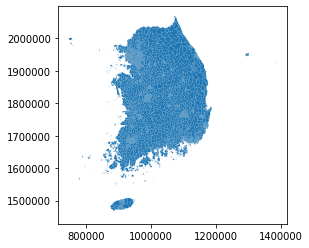

In [33]:
%time korea.plot()

In [34]:
# korea["EMD_CD"] = korea["EMD_CD"].astype(str)

* <h5> 금정구만 찾아서 뽑으려면 어떻게 해야할까 ?  </h5>

[행정표준코드관리시스템 ( 법정동 코드 = EMD_CD )](https://www.code.go.kr/index.do)

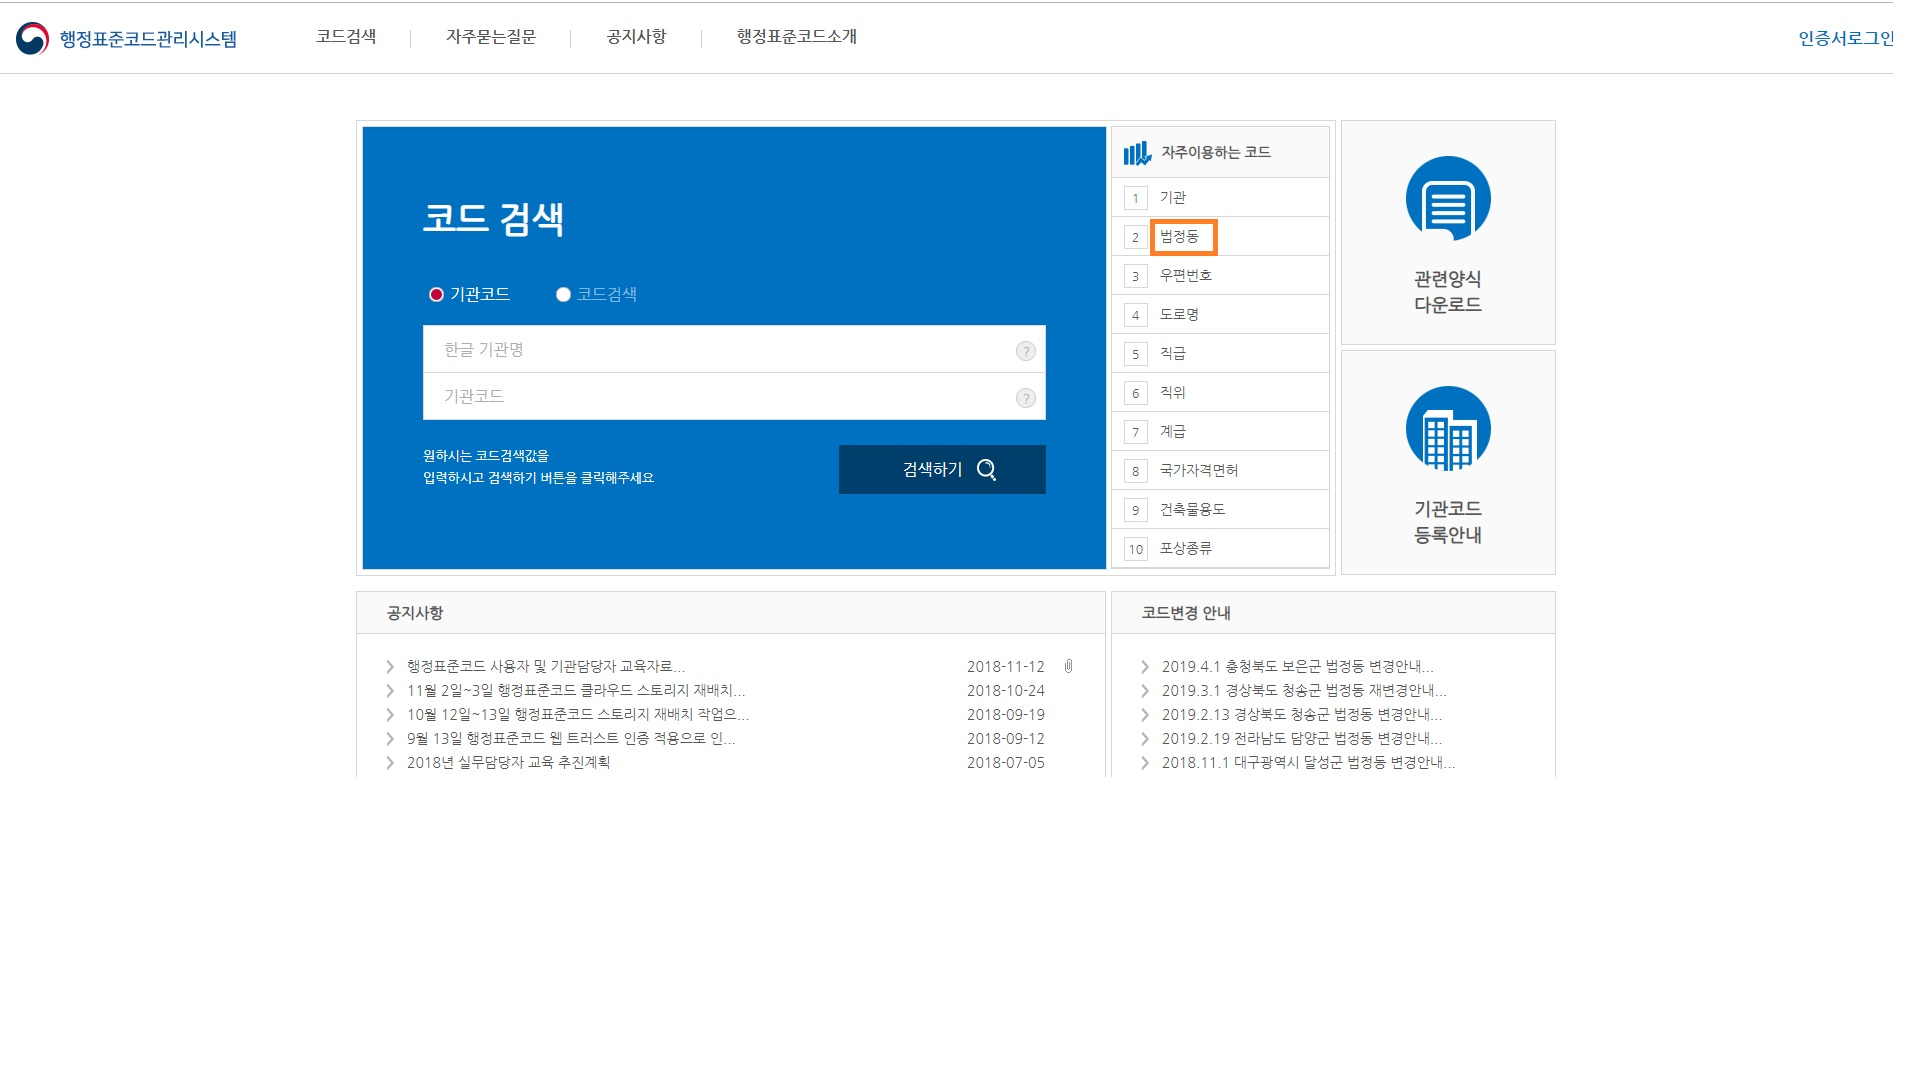
<br>
<br>
<br>
<br>
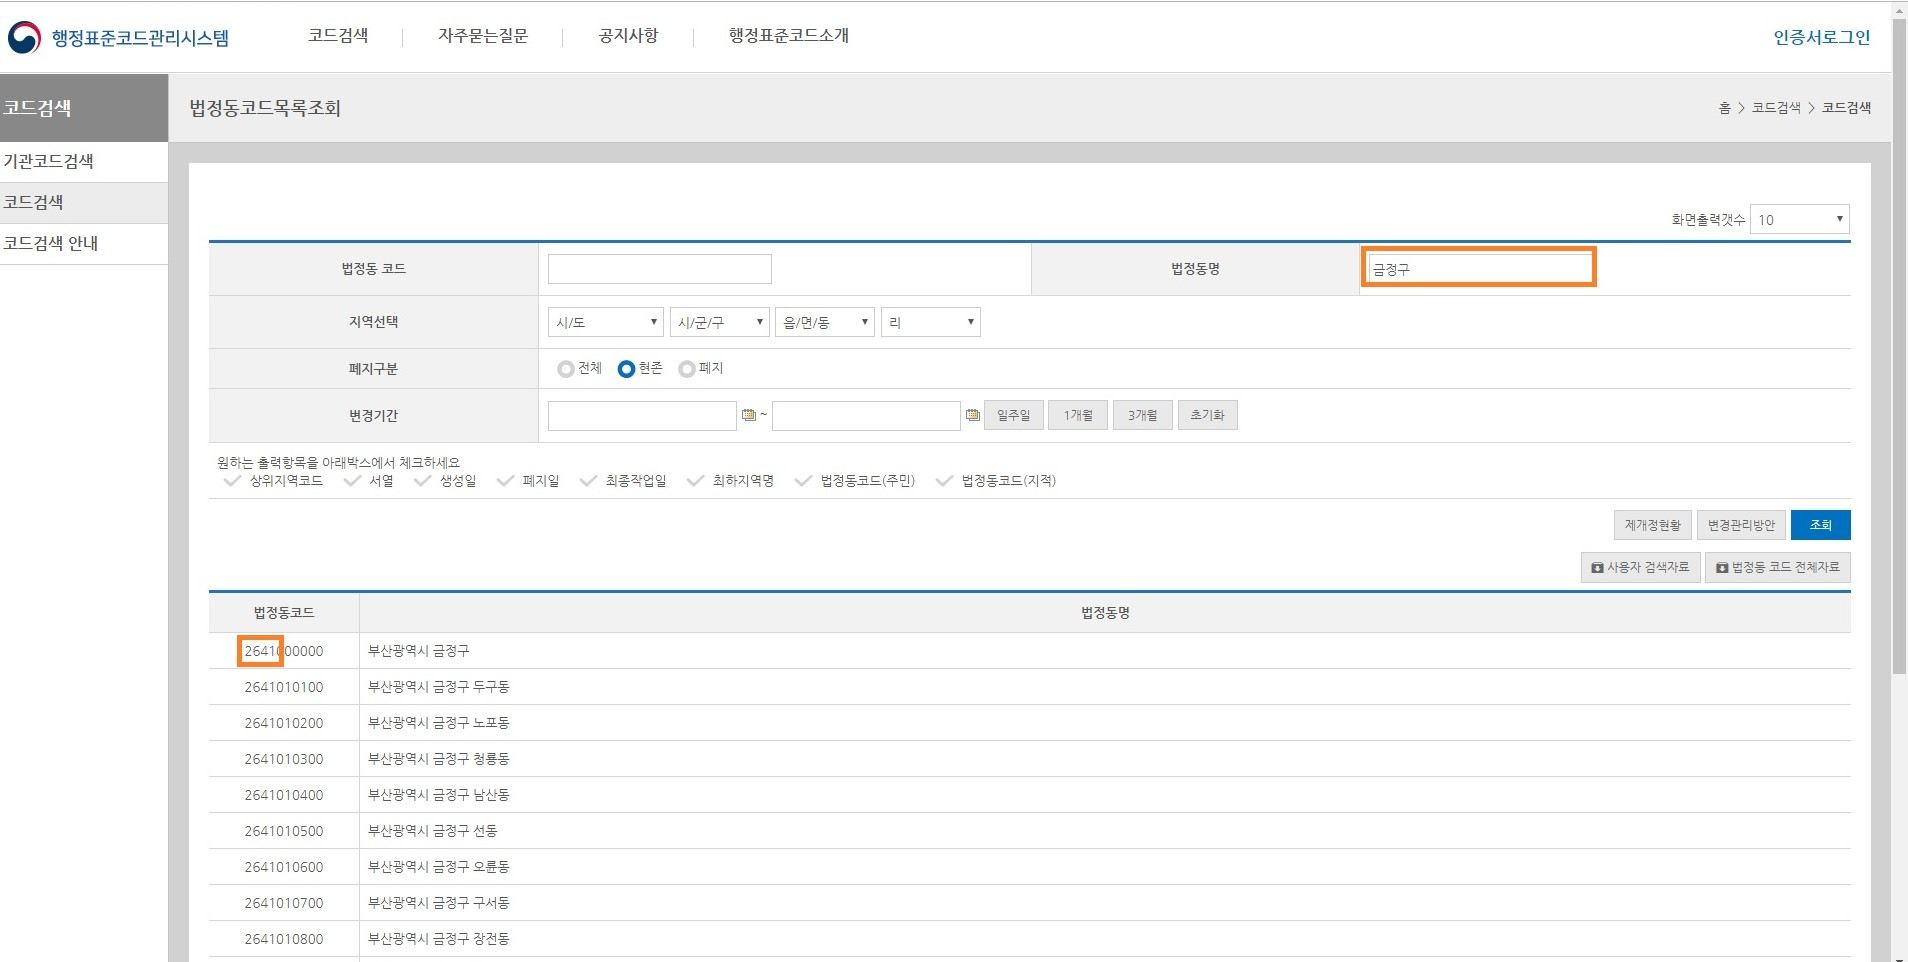

In [35]:
# 금정구 안에 속하는 동 가져오기
gj = korea[korea["EMD_CD"].str.contains("^2641")]

In [36]:
gj.head()

,EMD_CD,EMD_ENG_NM,EMD_KOR_NM,geometry
2833,26410101,Dugu-dong,두구동,"POLYGON ((1145077.705158763 1698871.747796491,..."
2834,26410102,Nopo-dong,노포동,"POLYGON ((1143150.43997646 1700609.498789801, ..."
2835,26410103,Cheongnyong-dong,청룡동,"POLYGON ((1141031.602736156 1699417.47271886, ..."
2836,26410104,Namsan-dong,남산동,"POLYGON ((1141935.01427121 1698329.196809974, ..."
2837,26410105,Seon-dong,선동,"POLYGON ((1145142.284503465 1697577.767709788,..."


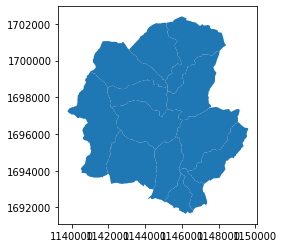

In [37]:
gj.plot()

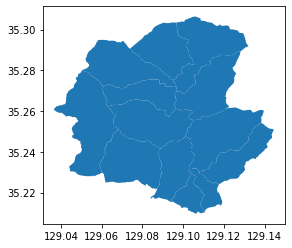

In [38]:
gj.to_crs(epsg=4326).plot()

In [39]:
dong = gj["EMD_KOR_NM"].unique()
dong

array(['두구동', '노포동', '청룡동', '남산동', '선동', '오륜동', '구서동', '장전동', '부곡동', '서동',
       '금사동', '회동동', '금성동'], dtype=object)

In [40]:
dong = pd.DataFrame(dong)
dong

,0
0,두구동
1,노포동
2,청룡동
3,남산동
4,선동
5,오륜동
6,구서동
7,장전동
8,부곡동
9,서동


In [41]:
dong.columns = ["address"]
dong

,address
0,두구동
1,노포동
2,청룡동
3,남산동
4,선동
5,오륜동
6,구서동
7,장전동
8,부곡동
9,서동


#### 지금까지 만들었던 변수에 대해 한번 정리를 하고 넘어가보겠습니다!.

* <h5> stores : (부산 일반 음식점 )  </h5>
    

* <h5> stores_trim : stores[["소재지주소","업태구분명"]]  </h5>


* <h5> ck : stores_trim [ 소재지 주소(금정구 >> +동) , 업태구분명(통닭)  ] </h5>

* <h5> ck_count : ck에서 같은 주소끼리 count 한것  </h5>

* <h5> df_ck : ck_count 에서 동이름을 모아놓은  열이름 address , count 한것은 치킨집의 갯수라는 의미에서 chicken </h5>

* <h5> korea: 읍면동 단위로 잘림 전국 지도  </h5>

* <h5> gj : korea 에서 금정구만 뽑아온것 </h5>

* <h5> dong:  금정구 안에 있는 모든 동 </h5>

In [42]:
dong_df = pd.merge(dong, df_ck, on="address", how="outer")
dong_df

,address,chicken
0,두구동,NaN
1,노포동,2.0
2,청룡동,11.0
3,남산동,92.0
4,선동,NaN
5,오륜동,NaN
6,구서동,126.0
7,장전동,299.0
8,부곡동,182.0
9,서동,213.0


In [43]:
#결측치 0으로 바꾸기 
dong_df = dong_df.fillna(0)
dong_df

,address,chicken
0,두구동,0.0
1,노포동,2.0
2,청룡동,11.0
3,남산동,92.0
4,선동,0.0
5,오륜동,0.0
6,구서동,126.0
7,장전동,299.0
8,부곡동,182.0
9,서동,213.0


In [44]:
dong_df["chicken"] = dong_df["chicken"].astype(int)
dong_df

,address,chicken
0,두구동,0
1,노포동,2
2,청룡동,11
3,남산동,92
4,선동,0
5,오륜동,0
6,구서동,126
7,장전동,299
8,부곡동,182
9,서동,213


In [45]:
type(gj)

geopandas.geodataframe.GeoDataFrame

In [46]:
type(dong_df)

pandas.core.frame.DataFrame

In [47]:
gj.head()

,EMD_CD,EMD_ENG_NM,EMD_KOR_NM,geometry
2833,26410101,Dugu-dong,두구동,"POLYGON ((1145077.705158763 1698871.747796491,..."
2834,26410102,Nopo-dong,노포동,"POLYGON ((1143150.43997646 1700609.498789801, ..."
2835,26410103,Cheongnyong-dong,청룡동,"POLYGON ((1141031.602736156 1699417.47271886, ..."
2836,26410104,Namsan-dong,남산동,"POLYGON ((1141935.01427121 1698329.196809974, ..."
2837,26410105,Seon-dong,선동,"POLYGON ((1145142.284503465 1697577.767709788,..."


In [48]:
dong_df.columns = ["EMD_KOR_NM", "chicken"]
dong_df

,EMD_KOR_NM,chicken
0,두구동,0
1,노포동,2
2,청룡동,11
3,남산동,92
4,선동,0
5,오륜동,0
6,구서동,126
7,장전동,299
8,부곡동,182
9,서동,213


In [49]:
gj_ck = pd.merge(gj, dong_df, on="EMD_KOR_NM", how="left")
gj_ck

,EMD_CD,EMD_ENG_NM,EMD_KOR_NM,geometry,chicken
0,26410101,Dugu-dong,두구동,"POLYGON ((1145077.705158763 1698871.747796491,...",0
1,26410102,Nopo-dong,노포동,"POLYGON ((1143150.43997646 1700609.498789801, ...",2
2,26410103,Cheongnyong-dong,청룡동,"POLYGON ((1141031.602736156 1699417.47271886, ...",11
3,26410104,Namsan-dong,남산동,"POLYGON ((1141935.01427121 1698329.196809974, ...",92
4,26410105,Seon-dong,선동,"POLYGON ((1145142.284503465 1697577.767709788,...",0
5,26410106,Oryun-dong,오륜동,"POLYGON ((1145668.179955249 1695864.776154272,...",0
6,26410107,Guseo-dong,구서동,"POLYGON ((1142183.371801942 1697446.987991395,...",126
7,26410108,Jangjeon-dong,장전동,"POLYGON ((1141870.007173073 1694298.381299875,...",299
8,26410109,Bugok-dong,부곡동,"POLYGON ((1144157.635542508 1692466.042200571,...",182
9,26410110,Seo-dong,서동,"POLYGON ((1145076.404993381 1692345.934570952,...",213


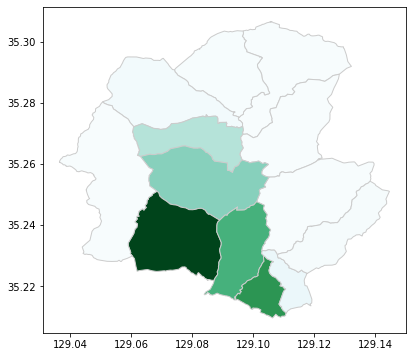

In [50]:
fig, ax = plt.subplots(1, figsize=(10,6))
gj_ck.to_crs(epsg=4326).plot(column="chicken", cmap='BuGn', ax=ax , edgecolor='0.8')

In [51]:
stores

,번호,개방서비스명,개방서비스ID,개방자치단체코드,관리번호,인허가일자,영업상태구분코드,영업상태명,상세영업상태코드,상세영업상태명,...,소재지우편번호,소재지전체주소,도로명전체주소,도로명우편번호,사업장명,업태구분명,좌표정보(X),좌표정보(Y),위생업태명,시설총규모
0,1,일반음식점,07_24_04_P,3250000,3250000-101-1975-01665,19750422,1,영업/정상,1,영업,...,600011.0,부산광역시 중구 중앙동1가 21-3번지,부산광역시 중구 중앙대로29번길 2-11 (중앙동1가),48957.0,중앙식당,한식,385573.789754,179849.859820,한식,13.00
1,2,일반음식점,07_24_04_P,3250000,3250000-101-1975-01664,19750422,1,영업/정상,1,영업,...,600011.0,부산광역시 중구 중앙동1가 21-3번지,부산광역시 중구 중앙대로29번길 2-11 (중앙동1가),48957.0,실비쭈꾸미,한식,385584.002407,179852.210611,한식,0.00
2,3,일반음식점,07_24_04_P,3250000,3250000-101-2019-00027,20190403,1,영업/정상,1,영업,...,600043.0,부산광역시 중구 남포동3가 14-5번지,"부산광역시 중구 남포길 6, 지상5층 (남포동3가)",48953.0,탑플로어(Top floor),기타,384972.285484,179636.032683,기타,109.50
3,4,일반음식점,07_24_04_P,3250000,3250000-101-2019-00029,20190409,1,영업/정상,1,영업,...,600809.0,부산광역시 중구 부평동3가 64-3번지,"부산광역시 중구 보수대로44번길 10-1, 1층 (부평동3가)",48975.0,림스치킨 부평점,기타,384466.492771,179908.574342,기타,44.30
4,5,일반음식점,07_24_04_P,3250000,3250000-101-2019-00035,20190418,1,영업/정상,1,영업,...,600061.0,부산광역시 중구 신창동1가 18-1번지,"부산광역시 중구 중구로34번길 20, 지상1층 (신창동1가)",48947.0,봉자네,한식,385023.067386,179871.783262,한식,39.77
5,6,일반음식점,07_24_04_P,3250000,3250000-101-2019-00028,20190408,1,영업/정상,1,영업,...,600802.0,부산광역시 중구 보수동1가 104-4번지,"부산광역시 중구 책방골목길 4-1, 1층 (보수동1가)",48967.0,봄같은한끼,기타,384641.216639,180203.966257,기타,29.75
6,7,일반음식점,07_24_04_P,3250000,3250000-101-2019-00031,20190411,1,영업/정상,1,영업,...,600017.0,부산광역시 중구 중앙동7가 20-1번지 롯데백화점광복점,"부산광역시 중구 중앙대로 2, 롯데백화점광복점 10층 (중앙동7가)",48944.0,명란명가,한식,385590.814677,179553.867032,한식,139.94
7,8,일반음식점,07_24_04_P,3250000,3250000-101-2019-00030,20190410,1,영업/정상,1,영업,...,600033.0,부산광역시 중구 광복동3가 1-1번지,"부산광역시 중구 광복중앙로24번길 4, 2층 (광복동3가)",48949.0,일바(1Bar),기타,385137.755284,179926.770645,기타,54.30
8,9,일반음식점,07_24_04_P,3250000,3250000-101-2019-00039,20190422,1,영업/정상,1,영업,...,600713.0,부산광역시 중구 신창동4가 44-3번지 국제시장1공구,"부산광역시 중구 국제시장2길 33, 국제시장1공구 상층 13-1, 13-2, 14-...",48945.0,메이드 인 피자,경양식,384865.676873,180021.722851,경양식,12.80
9,10,일반음식점,07_24_04_P,3250000,3250000-101-2019-00038,20190422,1,영업/정상,1,영업,...,600025.0,부산광역시 중구 동광동5가 12-72번지 201호,"부산광역시 중구 동영로 14-1, 지상1층 (동광동5가)",48921.0,은송죽집,한식,385366.903814,180678.339859,한식,31.83


In [52]:
stores_xy = stores[["소재지전체주소", "업태구분명", "사업장명", "좌표정보(X)", "좌표정보(Y)"]]
stores_xy.columns = ["address", "business", "name", "long", "lat"]
stores_xy = stores_xy[stores_xy["address"].str.contains("금정구") & stores_xy["business"].str.contains("통닭")].copy()
# stores_xy["address"] = stores_xy["address"].str.extract("(\S+동)")

In [53]:
stores_xy.head()

,address,business,name,long,lat
69090,부산광역시 금정구 장전동 419-21번지,호프/통닭,시카고,389678.909043,194343.258411
69095,부산광역시 금정구 청룡동 83-12번지,통닭(치킨),맥시칸통닭,390327.966445,199533.243826
69163,부산광역시 금정구 장전동 413-10번지,호프/통닭,폼프리츠,389979.208425,194450.646372
69173,부산광역시 금정구 장전동 302-10번지,통닭(치킨),키주스토리Ⅱ,389965.491625,194227.441016
69174,부산광역시 금정구 장전동 418-9번지,호프/통닭,티바,389794.339288,194601.025623


In [54]:
stores_xy["address"].isna().sum()

0

In [55]:
stores_xy["lat"].isna().sum()

18

In [56]:
stores_xy["long"].isna().sum()

18

https://github.com/wan2land/python-geo-converter

In [57]:
import GeoConverter

In [58]:
xy = []
for x,y in stores_xy[["long","lat"]].values:
    output = GeoConverter.convert(GeoConverter.TM, GeoConverter.GEO, GeoConverter.GeoPoint(x,y))
    xy.append([output.getX(), output.getY()])

In [59]:
xy

[[129.08429877286687, 35.23042708512641],
 [129.09262384237823, 35.27705225554707],
 [129.08762014873935, 35.23133762064723],
 [129.08741812193998, 35.229329715610376],
 [129.08562530357725, 35.232727095723135],
 [129.0855111108775, 35.2307346246266],
 [129.09216312446776, 35.22464955844978],
 [129.10316061436419, 35.214718776713276],
 [129.0837912291249, 35.22980671277973],
 [129.08481884747226, 35.229718398383355],
 [129.08534614397283, 35.23287739861992],
 [129.08639571753147, 35.2429443118119],
 [129.08965805944672, 35.25352003717695],
 [129.0904643235382, 35.238016404945874],
 [129.08821350317746, 35.24668398295136],
 [129.09225849320285, 35.266583951346604],
 [129.084893991194, 35.2325410664636],
 [129.08489779524606, 35.23125075279927],
 [129.10687889704434, 35.21480782600334],
 [129.088216295891, 35.22156126849345],
 [129.08616929535066, 35.23178727764511],
 [129.10711103369817, 35.215200501431184],
 [129.10666419816067, 35.214968914850004],
 [129.08754483345842, 35.22050951761

In [60]:
pd.DataFrame(xy).head()

,0,1
0,129.084299,35.230427
1,129.092624,35.277052
2,129.087620,35.231338
3,129.087418,35.229330
4,129.085625,35.232727


In [61]:
stores_xy.index

Int64Index([69090, 69095, 69163, 69173, 69174, 69216, 69232, 69251, 69258,
            69262,
            ...
            76547, 76550, 76565, 76571, 76576, 76581, 76585, 76586, 76587,
            76597],
           dtype='int64', length=955)

In [62]:
pd.DataFrame(xy, index = stores_xy.index).head()

,0,1
69090,129.084299,35.230427
69095,129.092624,35.277052
69163,129.087620,35.231338
69173,129.087418,35.229330
69174,129.085625,35.232727


In [63]:
stores_xy[["long_x","lat_y"]] = pd.DataFrame(xy, index = stores_xy.index).copy()

In [64]:
stores_xy.head()

,address,business,name,long,lat,long_x,lat_y
69090,부산광역시 금정구 장전동 419-21번지,호프/통닭,시카고,389678.909043,194343.258411,129.084299,35.230427
69095,부산광역시 금정구 청룡동 83-12번지,통닭(치킨),맥시칸통닭,390327.966445,199533.243826,129.092624,35.277052
69163,부산광역시 금정구 장전동 413-10번지,호프/통닭,폼프리츠,389979.208425,194450.646372,129.087620,35.231338
69173,부산광역시 금정구 장전동 302-10번지,통닭(치킨),키주스토리Ⅱ,389965.491625,194227.441016,129.087418,35.229330
69174,부산광역시 금정구 장전동 418-9번지,호프/통닭,티바,389794.339288,194601.025623,129.085625,35.232727


비어있는 경도 위도를 채워보자.

In [100]:
f = open("google_api_key.txt", "r")
#f = open("google_semin.api", "r")
key = f.readline()
f.close()

In [101]:
import googlemaps

In [103]:
gmap_address = googlemaps.Client(key = key)

In [104]:
add = gmap_address.geocode("계명대", language="ko")

In [105]:
print(add)

[{'address_components': [{'long_name': '５６', 'short_name': '５６', 'types': ['premise']}, {'long_name': '달성로', 'short_name': '달성로', 'types': ['political', 'sublocality', 'sublocality_level_4']}, {'long_name': '성내2동', 'short_name': '성내2동', 'types': ['political', 'sublocality', 'sublocality_level_2']}, {'long_name': '중구', 'short_name': '중구', 'types': ['political', 'sublocality', 'sublocality_level_1']}, {'long_name': '대구광역시', 'short_name': '대구광역시', 'types': ['administrative_area_level_1', 'political']}, {'long_name': '대한민국', 'short_name': 'KR', 'types': ['country', 'political']}, {'long_name': '700-310', 'short_name': '700-310', 'types': ['postal_code']}], 'formatted_address': '대한민국 대구광역시 중구 성내2동 달성로 56', 'geometry': {'location': {'lat': 35.86941650000001, 'lng': 128.5829852}, 'location_type': 'ROOFTOP', 'viewport': {'northeast': {'lat': 35.87076548029151, 'lng': 128.5843341802915}, 'southwest': {'lat': 35.86806751970851, 'lng': 128.5816362197085}}}, 'place_id': 'ChIJX8OO-VflZTURkGPFe5kjTB

In [106]:
add[0]

{'address_components': [{'long_name': '５６',
   'short_name': '５６',
   'types': ['premise']},
  {'long_name': '달성로',
   'short_name': '달성로',
   'types': ['political', 'sublocality', 'sublocality_level_4']},
  {'long_name': '성내2동',
   'short_name': '성내2동',
   'types': ['political', 'sublocality', 'sublocality_level_2']},
  {'long_name': '중구',
   'short_name': '중구',
   'types': ['political', 'sublocality', 'sublocality_level_1']},
  {'long_name': '대구광역시',
   'short_name': '대구광역시',
   'types': ['administrative_area_level_1', 'political']},
  {'long_name': '대한민국', 'short_name': 'KR', 'types': ['country', 'political']},
  {'long_name': '700-310', 'short_name': '700-310', 'types': ['postal_code']}],
 'formatted_address': '대한민국 대구광역시 중구 성내2동 달성로 56',
 'geometry': {'location': {'lat': 35.86941650000001, 'lng': 128.5829852},
  'location_type': 'ROOFTOP',
  'viewport': {'northeast': {'lat': 35.87076548029151,
    'lng': 128.5843341802915},
   'southwest': {'lat': 35.86806751970851, 'lng': 128.581

In [107]:
add[0]['geometry']

{'location': {'lat': 35.86941650000001, 'lng': 128.5829852},
 'location_type': 'ROOFTOP',
 'viewport': {'northeast': {'lat': 35.87076548029151,
   'lng': 128.5843341802915},
  'southwest': {'lat': 35.86806751970851, 'lng': 128.5816362197085}}}

In [108]:
print(add[0]['geometry']['location']['lat'])
print(add[0]['geometry']['location']['lng'])

35.86941650000001
128.5829852


In [109]:
def AddressToLL(text_address):
    LL = gmap_address.geocode(text_address, language="ko")
    return [LL[0]['geometry']['location']['lng'], LL[0]['geometry']['location']['lat']]
 

In [110]:
stores_xy.index

Int64Index([69090, 69095, 69163, 69173, 69174, 69216, 69232, 69251, 69258,
            69262,
            ...
            76547, 76550, 76565, 76571, 76576, 76581, 76585, 76586, 76587,
            76597],
           dtype='int64', length=955)

In [111]:
stores_xy.loc[69090, 'lat']

194343.258410869

In [112]:
import math

for i in stores_xy.index:
    if math.isnan(stores_xy.loc[i, "lat"]):
        stores_xy.loc[i, "long_x"], stores_xy.loc[i, "lat_y"] = AddressToLL(stores_xy.loc[i, "address"])

In [113]:
stores_xy.head()

,address,business,name,long,lat,long_x,lat_y
69090,부산광역시 금정구 장전동 419-21번지,호프/통닭,시카고,389678.909043,194343.258411,129.084299,35.230427
69095,부산광역시 금정구 청룡동 83-12번지,통닭(치킨),맥시칸통닭,390327.966445,199533.243826,129.092624,35.277052
69163,부산광역시 금정구 장전동 413-10번지,호프/통닭,폼프리츠,389979.208425,194450.646372,129.087620,35.231338
69173,부산광역시 금정구 장전동 302-10번지,통닭(치킨),키주스토리Ⅱ,389965.491625,194227.441016,129.087418,35.229330
69174,부산광역시 금정구 장전동 418-9번지,호프/통닭,티바,389794.339288,194601.025623,129.085625,35.232727


In [114]:
stores_xy["long_x"].isna().sum()

0

In [115]:
stores_xy["lat_y"].isna().sum()

0

In [116]:
stores_xy["long_x"].unique()

array([129.08429877, 129.09262384, 129.08762015, 129.08741812,
       129.0856253 , 129.08551111, 129.09216312, 129.10316061,
       129.08379123, 129.08481885, 129.08534614, 129.08639572,
       129.08965806, 129.09046432, 129.0882135 , 129.09225849,
       129.08489399, 129.0848978 , 129.1068789 , 129.0882163 ,
       129.0861693 , 129.10711103, 129.1066642 , 129.08754483,
       129.08502559, 129.10751648, 129.09188636, 129.10635847,
       129.10665214, 129.09776191, 129.08971597, 129.0873837 ,
       129.09717865, 129.08425679, 129.09163205, 129.08702951,
       129.08247225, 129.09078973, 129.09850162, 129.10352686,
       129.10557207, 129.10456649, 129.08714968, 129.10680729,
       129.09090815, 129.08644346, 129.08669724, 129.08589006,
       129.09089028, 129.08528112, 129.08515187, 129.10681229,
       129.08503395, 129.08631561, 129.09422821, 129.10774914,
       129.08537791, 129.09062544, 129.08850599, 129.08879619,
       129.09081147, 129.08365952, 129.08984293, 129.10

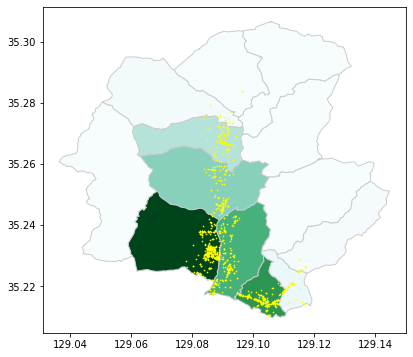

In [117]:
fig, ax = plt.subplots(1, figsize=(10,6))
gj_ck.to_crs(epsg=4326).plot(column="chicken", cmap='BuGn', ax=ax, edgecolor='0.8')
plt.scatter(stores_xy["long_x"], stores_xy["lat_y"], s=.4, color="yellow")

https://github.com/pbugnion/gmaps

In [118]:
import gmaps
import gmaps.datasets

gmaps.configure(api_key = key) # Your Google API key

In [119]:
stores_xy[["long_x","lat_y"]].head()

,long_x,lat_y
69090,129.084299,35.230427
69095,129.092624,35.277052
69163,129.087620,35.231338
69173,129.087418,35.229330
69174,129.085625,35.232727


In [120]:
df = gmaps.datasets.load_dataset_as_df('earthquakes')

fig = gmaps.figure()
heatmap_layer = gmaps.heatmap_layer(
    df[['latitude', 'longitude']], weights=df['magnitude'],
    max_intensity=30, point_radius=3.0
)
fig.add_layer(heatmap_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [121]:
df = gmaps.datasets.load_dataset_as_df('starbucks_kfc_uk')

starbucks_df = df[df['chain_name'] == 'starbucks']
starbucks_df = starbucks_df[['latitude', 'longitude']]

starbucks_layer = gmaps.symbol_layer(
    starbucks_df, 
    fill_color='green', 
    stroke_color='green', 
    scale=1
)
fig = gmaps.figure()
fig.add_layer(starbucks_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [122]:
store_layer = gmaps.symbol_layer(
    stores_xy[["lat_y", "long_x"]],
    fill_color='yellow', 
    stroke_color='yellow', 
    scale=2
)

fig = gmaps.figure()
fig.add_layer(store_layer)
fig

Figure(layout=FigureLayout(height='420px'))